# Metropolis Hastings

En esta sección vamos a ver tres métodos diferentes para generar una muestra de
puntos que sigan una distribución determinada.  
La función de distribución que vamos a utilizar es $\sin(x)/2$ en el intervalo $0<x<\pi$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
n_puntos=1000
x = np.linspace(0, np.pi)
def f(x):
    y = 0.5 * np.sin(x)
    if(np.isscalar(x)):# esto va a funcionar si entra un numero
        if (x>np.pi) | (x<0):
            y = 0
    else: #esto va a funcionar si entra un array
        ii = (x>np.pi) | (x<0)
        y[ii] = 0.0
    return y

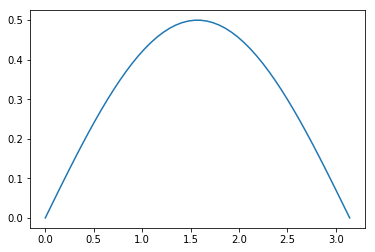

In [6]:
plt.plot(x, f(x))


# Fuerza Bruta

El primer metodo que vamos a utlizar para generar $N$ puntos que sigan esta distribucion es fuerza bruta.

Vamos a generar un punto $x_i$ de una distribucion uniforme entre $0$ y $\pi$, para cada punto generamos 
un segundo n\'umero aleatorio $y_i$ de una distribuci\'on uniforme entre $0$ y el m\'aximo de f(x), que en este caso es 0.5 y nos preguntamos si $y_i<f(x_i)$ entonces incluimos a $x_i$ en la lista, si no se cumple esta condicion descartamos a ese punto $x_i$ para generar uno nuevo.

Escrito en codigo este metodo se ve asi

In [7]:
N = 100000

n_adentro = 0
n_intentos = 0
lista = []
while n_adentro < N:
    x_i = np.random.random()*np.pi
    y_i = np.random.random()/2.0
    n_intentos += 1
    if(y_i < f(x_i)):
        lista.append(x_i)
        n_adentro +=1 


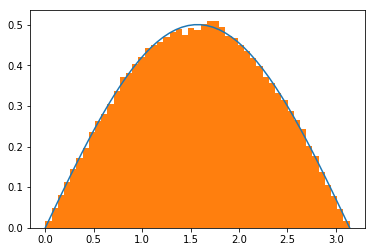

In [8]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

El problema es que tuvimos que generar muchos mas numeros (`n_intentos`) de los que al final 
terminaron en la lista `n_adentro`

In [9]:
print(n_adentro/n_intentos)

0.6356794141578519


# Integraci\'on anal\'itica

El segundo m\'etodo utiliza la integral cumulativa  $g(x) = \int_0^x f(y)dy$ que por definici\'on se
encuentra entre 0 y 1. En nuestro ejemplo tenemos $g(x)=-cos(x)/2 + 1/2$

In [10]:
def cumul_f(x):
    return - 0.5 * np.cos(x) + 0.5

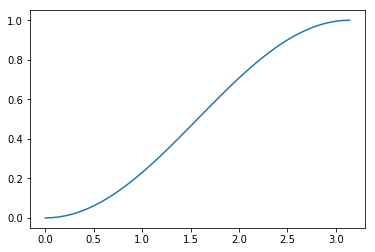

In [11]:
plt.plot(x, cumul_f(x))

Si generamos puntos $z_i$ con una distribucion uniforme entre 0 y 1, y calculamos $x_i=g^{-1}(z_i)$ todos los $x_i$ van a seguir la distribucion $f(x)$.

En nuestro caso $g^{-1}(x)$ es $\arccos(-2.0*(x-0.5))$

In [12]:
def inversa_cumul_f(x):
    return np.arccos(-2.0*(x-0.5))

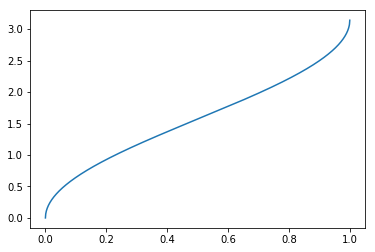

In [13]:
z = np.linspace(0,1.0, n_puntos)
plt.plot(z, inversa_cumul_f(z))

In [14]:
#De esta manera solamente tenemos que calcular

N = 100000
z = np.random.random(N)
lista = inversa_cumul_f(z)

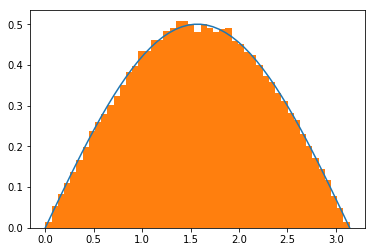

In [15]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

La desventaja de este metodo es que solamente es util si podemos integrar e invertir analiticamente la funcion de distribucion.

# Metropolis Hastings

Este metodo evita los problemas de los dos metodos anteriores.
Para empezar para generar N no voy a desperdiciar intentos y no voy a necesitar una integral 
analitica de la integral que necesito muestrear.

En este algoritmo empiezo con un n\'umero aleatorio $x_1$ que se encuentra en el rango de la funcion (puede venir de una distribuci\'on uniforme.
El segundo paso es proponer un n\'umero $x_{2}$ que viene de $x_{1}$ pero con un salto $\delta x$, $x_{2}=x_{1}+\delta_x$. Usualmente este $\delta_x$ es un n\'umero aleatorio que viene de una gaussiana centrada en cero y desviaci\'on est\'andar $\sigma$. 
El tercer paso es comparar la funci\'on de distribuci\'on en los dos puntos $r=f(x_{2})/f(x_{1})$.
El cuarto paso genera  un n\'umero aleatorio $\alpha$ de una distribuci\'on uniforme entre 0 y 1.
El quinto paso compara $\alpha$ con $\r$, si $\alpha>r$ entonces incluyo el punto $x_2$ en mi lista, en el caso contrario incluyo a $x_{1}$ en la lista. 
El procedimiento se repite hasta tener $N$ puntos en mi lista.



In [49]:
N = 100000
lista = [np.random.random()*np.pi]
sigma_delta = 1.0

for i in range(1,N):
    propuesta  = lista[i-1] + np.random.normal(loc=0.0, scale=sigma_delta)
    r = f(propuesta)/f(lista[i-1])
    alpha = np.random.random()
    if(alpha<r):
        lista.append(propuesta)
    else:
        lista.append(lista[i-1])

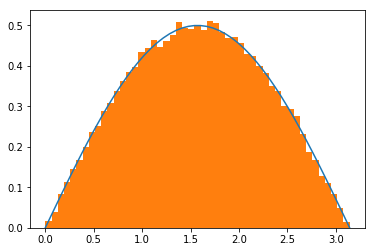

In [50]:
plt.plot(x, f(x))
_ = plt.hist(lista, density=True, bins=x)

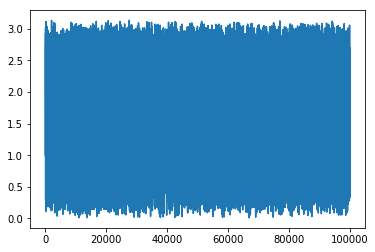

In [51]:
plt.plot(lista)

# Ejercicio 2.1

Utilizando metropolis hastings onstruya muestras en dos dimenciones ($x$ y $y$)
que sigan la función de distribución $f(x,y)=\exp\left( -\frac{1}{2}(x^2 + \frac{y^2}{9} - \frac{xy}{12}) \right)$.

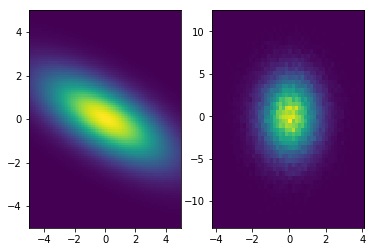

In [147]:
def dens(x, y):
    return np.exp(-0.5*(x**2/4 + y**2 +x*y/1.5))

# Genera puntos sobre una grid
x_line = np.linspace(-5,5,100)
y_line = np.linspace(-5,5,100)
x_grid, y_grid = np.meshgrid(x_line, y_line)
z_grid = dens(x_grid, y_grid)

# Genera lista de puntos
x_lista = np.random.normal(size=N)
y_lista = np.random.normal(scale=3.0, size=N)

fig, (ax0, ax1) = plt.subplots(1,2)

# grafica los puntos de la grid
im = ax0.pcolormesh(x_grid, y_grid, z_grid)

# grafica el histograma bidimensional a partir de la lista de puntos
_ = plt.hist2d(x_lista, y_lista, bins=50)